In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()
data_dir = Path(cached_dirs.cache_dir, 'rfm/by_toolevents/iteration4')

In [3]:
df = pd.read_csv(
    Path(cached_dirs.cache_dir, 'unclassified_user_data.csv'),
    index_col=False
)

In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
monetary_df = df[['user', 'job_count', 'job_event_days']].copy()
monetary_df['Monetary'] = monetary_df['job_count']/monetary_df['job_event_days']

users = pd.merge(users, monetary_df, on='user')
display(monetary_df)

,user,job_count,job_event_days,Monetary
0,0117tomboy,20,5,4.000000
1,0190matze,20,3,6.666667
2,061962588x,40,5,8.000000
3,061972018x,66,4,16.500000
4,0808wodlr,13,2,6.500000
...,...,...,...,...
36533,zzpnm003,11,2,5.500000
36534,zzxhuang,21,3,7.000000
36535,zzxtcwz,4,2,2.000000
36536,zzyang19891221,82,13,6.307692


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


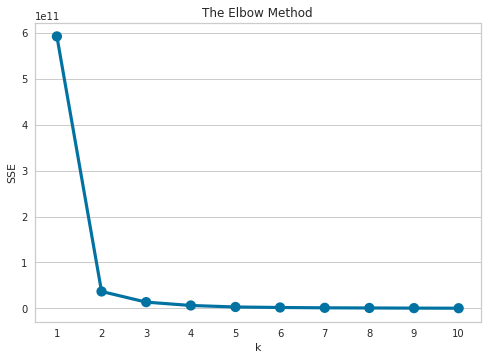

In [6]:
elbow_curve(users[['Monetary']])

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(users[['Monetary']])
users['MonetaryCluster'] = kmeans.predict(users[['Monetary']])

display(users.groupby('MonetaryCluster')['Monetary'].describe())
display(users.groupby('MonetaryCluster')[['job_count', 'job_event_days']].describe())

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,36534.0,109.838013,605.026807,1.0,3.200000,6.000000,14.250000,24040.000000
1,1.0,745208.000000,NaN,745208.0,745208.000000,745208.000000,745208.000000,745208.000000
2,3.0,88107.284076,13183.555444,77899.5,80665.118421,83430.736842,93211.176113,102991.615385


job_count                                                     \
                    count          mean            std        min        25%   
MonetaryCluster                                                                
0                 36534.0  9.656983e+02   13435.493592        2.0       10.0   
1                     1.0  8.942496e+06            NaN  8942496.0  8942496.0   
2                     3.0  1.026625e+06  764145.317827   155799.0   747345.0   

                                                 job_event_days             \
                       50%        75%        max          count       mean   
MonetaryCluster                                                              
0                     26.0      104.0  1336224.0        36534.0   6.966962   
1                8942496.0  8942496.0  8942496.0            1.0  12.000000   
2                1338891.0  1462037.5  1585184.0            3.0  11.333333   

                                                           
                       std   min   25%   50%   75%    max  
MonetaryCluster                                            
0                13.821539   2.0   2.0   4.0   7.0  966.0  
1                      NaN  12.0  12.0  12.0  12.0   12.0  
2                 8.621678   2.0   7.5  13.0  16.0   19.0

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Monetary']])
users['MonetaryCluster'] = kmeans.predict(users[['Monetary']])

display(users.groupby('MonetaryCluster')[['job_count', 'job_event_days']].describe())

job_count                                                      \
                    count          mean            std        min         25%   
MonetaryCluster                                                                 
0                 36212.0  5.631219e+02    5897.473944        2.0       10.00   
1                     1.0  8.942496e+06            NaN  8942496.0  8942496.00   
2                     3.0  1.026625e+06  764145.317827   155799.0   747345.00   
3                   322.0  4.623929e+04  120608.082767     4992.0    10892.75   

                                                  job_event_days             \
                       50%         75%        max          count       mean   
MonetaryCluster                                                               
0                     26.0       98.00   603974.0        36212.0   6.952889   
1                8942496.0  8942496.00  8942496.0            1.0  12.000000   
2                1338891.0  1462037.50  1585184.0            3.0  11.333333   
3                  17264.5    32173.25  1336224.0          322.0   8.549689   

                                                            
                       std   min   25%   50%    75%    max  
MonetaryCluster                                             
0                13.800567   2.0   2.0   4.0   7.00  966.0  
1                      NaN  12.0  12.0  12.0  12.00   12.0  
2                 8.621678   2.0   7.5  13.0  16.00   19.0  
3                15.951221   2.0   3.0   4.0   7.75  176.0

In [9]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(users[['Monetary']])
users['MonetaryCluster'] = kmeans.predict(users[['Monetary']])

display(users.groupby('MonetaryCluster')[['job_count', 'job_event_days']].describe())

job_count                                                     \
                    count          mean            std        min        25%   
MonetaryCluster                                                                
0                 35847.0  4.113535e+02    4227.445593        2.0       10.0   
1                     1.0  8.942496e+06            NaN  8942496.0  8942496.0   
2                     3.0  1.026625e+06  764145.317827   155799.0   747345.0   
3                    36.0  1.617048e+05  253624.205119    16384.0    34504.0   
4                   651.0  2.260163e+04   61478.865948     2743.0     6245.5   

                                                  job_event_days             \
                       50%         75%        max          count       mean   
MonetaryCluster                                                               
0                     25.0       93.00   603974.0        35847.0   6.936089   
1                8942496.0  8942496.00  8942496.0            1.0  12.000000   
2                1338891.0  1462037.50  1585184.0            3.0  11.333333   
3                  55357.0   138807.75  1336224.0           36.0  11.500000   
4                  11224.0    19700.50  1201055.0          651.0   8.416283   

                                                           
                       std   min   25%   50%   75%    max  
MonetaryCluster                                            
0                13.690292   2.0   2.0   4.0   7.0  966.0  
1                      NaN  12.0  12.0  12.0  12.0   12.0  
2                 8.621678   2.0   7.5  13.0  16.0   19.0  
3                16.983185   2.0   3.0   5.0  11.5   89.0  
4                19.550258   2.0   3.0   4.0   8.0  301.0

In [10]:
users.to_csv(
    Path(data_dir, "monetary.csv"),
    index=False,
    index_label=False
)

In [11]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Monetary']])

Score for number of cluster(s) 2: -0.06653575652814395
Silhouette score for number of cluster(s) 2: 0.9996830853958429
Davies Bouldin score for number of cluster(s) 2: 0.0002568733495439076


'Centroids - '

[[1.55746465e-04]
 [1.00000000e+00]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -0.02470729625859818
Silhouette score for number of cluster(s) 3: 0.9976337909111062
Davies Bouldin score for number of cluster(s) 3: 0.0815615488270159


'Centroids - '

[[1.46050712e-04]
 [1.00000000e+00]
 [1.18230618e-01]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -0.011610152265508766
Silhouette score for number of cluster(s) 4: 0.9663376909574637
Davies Bouldin score for number of cluster(s) 4: 0.281501210324489


'Centroids - '

[[8.88011495e-05]
 [1.00000000e+00]
 [1.18230618e-01]
 [6.40770004e-03]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -0.005724091888385769
Silhouette score for number of cluster(s) 5: 0.9530560073264969
Davies Bouldin score for number of cluster(s) 5: 0.3138327800236326


'Centroids - '

[[6.52902512e-05]
 [1.00000000e+00]
 [1.18230618e-01]
 [3.57317797e-03]
 [1.76149822e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -0.00372266770023796
Silhouette score for number of cluster(s) 6: 0.934385458676372
Davies Bouldin score for number of cluster(s) 6: 0.3592571052940037


'Centroids - '

[[4.04619248e-05]
 [1.00000000e+00]
 [1.18230618e-01]
 [5.60396428e-03]
 [1.72429215e-03]
 [1.88981111e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -0.0024453032784213474
Silhouette score for number of cluster(s) 7: 0.9309391197077345
Davies Bouldin score for number of cluster(s) 7: 0.35325014116399583


'Centroids - '

[[3.63884483e-05]
 [1.00000000e+00]
 [1.18230618e-01]
 [4.62784813e-03]
 [1.16428999e-02]
 [1.49201043e-03]
 [2.64394422e-02]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -0.0018481958079843654
Silhouette score for number of cluster(s) 8: 0.9311129175116128
Davies Bouldin score for number of cluster(s) 8: 0.31514476169503636


'Centroids - '

[[3.72406143e-05]
 [1.00000000e+00]
 [1.38204036e-01]
 [4.65448517e-03]
 [1.16428999e-02]
 [1.52165882e-03]
 [2.64394422e-02]
 [1.08243909e-01]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -0.0012498681402549434
Silhouette score for number of cluster(s) 9: 0.9222533455083078
Davies Bouldin score for number of cluster(s) 9: 0.32916135754795794


'Centroids - '

[[2.67007833e-05]
 [1.00000000e+00]
 [1.08243909e-01]
 [6.38393616e-03]
 [2.98801537e-03]
 [2.70688115e-02]
 [1.00672034e-03]
 [1.38473639e-02]
 [1.38204036e-01]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -0.0009015415240870145
Silhouette score for number of cluster(s) 10: 0.9159897843227779
Davies Bouldin score for number of cluster(s) 10: 0.34664660681111875


'Centroids - '

[[1.90228136e-05]
 [1.00000000e+00]
 [1.08243909e-01]
 [7.01753765e-03]
 [2.70688115e-02]
 [1.88091044e-03]
 [1.38204036e-01]
 [3.86560893e-03]
 [1.39788940e-02]
 [6.68974735e-04]]
----------------------------------------------------------------------------------------------------


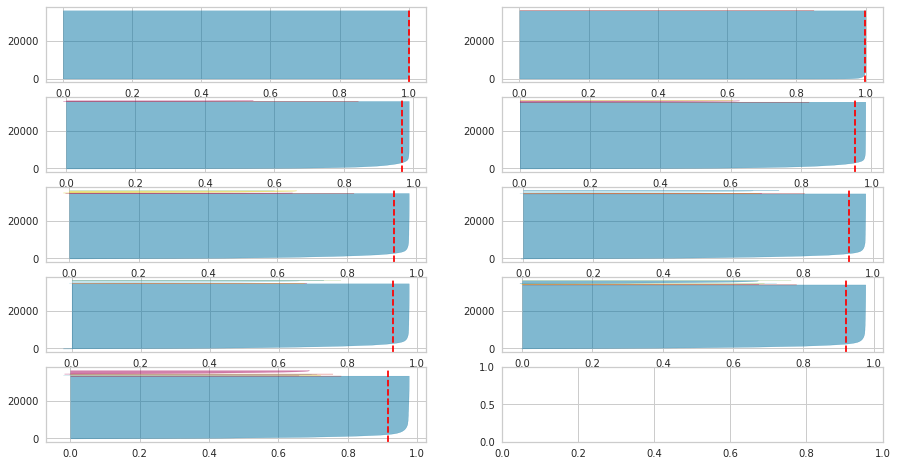

In [12]:
display_cluster_info(X_scaled)